In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import os

from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
df= pd.read_csv('Data-NLP/movie_reviews_v2.csv')
df

,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0
...,...,...,...,...,...,...
8645,64ba5c5706f98400e1169ed0,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,"I'm not really a great fan of Tom Cruise. Yes,...",7.0
8646,64bdab4dad50f0013b127c02,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,Spectacular cinematic action let down by an in...,6.0
8647,64cca28c43cd5400add62db6,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,The Tom Cruise “Mission Impossible” franchise ...,9.0
8648,652e4978caef2d0139df3b6c,575264,tt9603212,Mission: Impossible - Dead Reckoning Part One,It was a good movie. Not better than the pervi...,8.0


In [3]:
df.isna().sum()

review_id            0
movie_id             0
imdb_id              0
original_title       0
review               0
rating            1196
dtype: int64

In [4]:
def categorize_rating(rating):
    if rating >= 9:
        return 'High-rating'
    elif rating <= 4:
        return 'Low-rating'
    else:
        return None

In [5]:
df['target'] = df['rating'].apply(categorize_rating)
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,target
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,None
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,High-rating
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,None
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,None
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,None


In [6]:
df.dropna(subset=['target'], inplace=True)
df

,review_id,movie_id,imdb_id,original_title,review,rating,target
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,High-rating
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straig...",3.0,Low-rating
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I ...,2.0,Low-rating
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy g...",9.0,High-rating
20,6409202f0e441900e887a17b,4234,tt0134084,Scream 3,**_Scream 3’s_ lackluster screenplay and unima...,4.0,Low-rating
...,...,...,...,...,...,...,...
8629,6499e4de62f3350127477b22,569094,tt9362722,Spider-Man: Across the Spider-Verse,"I don't know, but in my humble opinion, the pu...",10.0,High-rating
8631,64cca1752f266b09ef121de5,569094,tt9362722,Spider-Man: Across the Spider-Verse,I don’t have that much to say about “Spider-Ma...,9.0,High-rating
8632,64de022bd100b614b2ef6547,569094,tt9362722,Spider-Man: Across the Spider-Verse,Incredible non stop action movie,10.0,High-rating
8639,6529c2000929f6010090f513,565770,tt9362930,Blue Beetle,"I mean, it's not bad. It has the message, but...",10.0,High-rating


**NLTK and SpaCy for basic text processing**

In [7]:
df['Tokenized'] = df['review'].apply(lambda x: x.split())
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,target,Tokenized
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,High-rating,"[A, guilty, pleasure, for, me, personally,, as..."
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straig...",3.0,Low-rating,"[The, first, underwhelmed, me,, but, this, one..."
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I ...,2.0,Low-rating,"[After, quite, entertainign, Mission, Impossib..."
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy g...",9.0,High-rating,"[Okay,, I, will, admit, I, can, be, a, bit, of..."
20,6409202f0e441900e887a17b,4234,tt0134084,Scream 3,**_Scream 3’s_ lackluster screenplay and unima...,4.0,Low-rating,"[**_Scream, 3’s_, lackluster, screenplay, and,..."


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [10]:
def lemmatize(review):
    doc = nlp(review)
    lemmatized_review = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return lemmatized_review

df['Lemmatized'] = df['review'].apply(lemmatize)
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,target,Tokenized,Lemmatized
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,High-rating,"[A, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, Great, Es..."
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straig...",3.0,Low-rating,"[The, first, underwhelmed, me,, but, this, one...","[underwhelme, straight, bore, course, see, Hun..."
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I ...,2.0,Low-rating,"[After, quite, entertainign, Mission, Impossib...","[entertainign, Mission, Impossible, second, in..."
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy g...",9.0,High-rating,"[Okay,, I, will, admit, I, can, be, a, bit, of...","[okay, admit, bit, easy, grader, come, romanti..."
20,6409202f0e441900e887a17b,4234,tt0134084,Scream 3,**_Scream 3’s_ lackluster screenplay and unima...,4.0,Low-rating,"[**_Scream, 3’s_, lackluster, screenplay, and,...","[Scream, 3, lackluster, screenplay, unimaginat..."


In [11]:
def join_lemmatized_text(tokens):
    return ' '.join(tokens)

In [12]:
df['Tokens-joined'] = df['Tokenized'].map(lambda x: " ".join(x))

df['Lemmas-joined'] = df['Lemmatized'].map(lambda x: " ".join(x))
df.head(3)

,review_id,movie_id,imdb_id,original_title,review,rating,target,Tokenized,Lemmatized,Tokens-joined,Lemmas-joined
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,High-rating,"[A, guilty, pleasure, for, me, personally,, as...","[guilty, pleasure, personally, love, Great, Es...","A guilty pleasure for me personally, as I love...",guilty pleasure personally love Great Escape w...
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straig...",3.0,Low-rating,"[The, first, underwhelmed, me,, but, this, one...","[underwhelme, straight, bore, course, see, Hun...","The first underwhelmed me, but this one straig...",underwhelme straight bore course see Hunt clim...
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I ...,2.0,Low-rating,"[After, quite, entertainign, Mission, Impossib...","[entertainign, Mission, Impossible, second, in...",After quite entertainign Mission Impossible I ...,entertainign Mission Impossible second install...


**EDA and Visualization**

In [13]:
filter_high = df['target'] == 'High-rating'
filter_low = df['target'] == 'Low-rating'

In [15]:
high_text = " ".join( df.loc[filter_high, 'review'])
print(high_text[:1000],"\n")

A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation. Okay, I will admit I can be a bit of an easy grader when it comes to romantic comedies, as long as they are witty with likable characters, don’t insult my intelligence and have suitable happy endings (I guess if they don’t end happily, they aren’t rom-coms).

I saw this movie many years ago, but had forgotten just enough of it to keep it fresh for me. Like many movies, the plot relies on a huge coincidence or three. The story gets sappy and sentimental in places, is rather predictable and has too much religion to suit me, but that last thing may suit you just fine, praise be. It was co-written and directed by the actress Bonnie Hunt, who is a supporting character in the film.

But there is a spark of chemistry between the two lead cha 



In [16]:
low_text = " ".join( df.loc[filter_low, 'review'])
print(low_text[:1000],"\n")

The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).

Even setting it in predominantly Australia was enough to grab my attention, and that's saying something cause I'm pretty biased when it comes to that. I hear tell that _Mission: Impossible II_ is the low point in the series, and that at least is encouraging, because if anything afterwards is much worse than this one, I don't know if I'll be able to make it through to Rogue Nation.

_Final rating:★½: - Boring/disappointing. Avoid if possible._ After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every f 



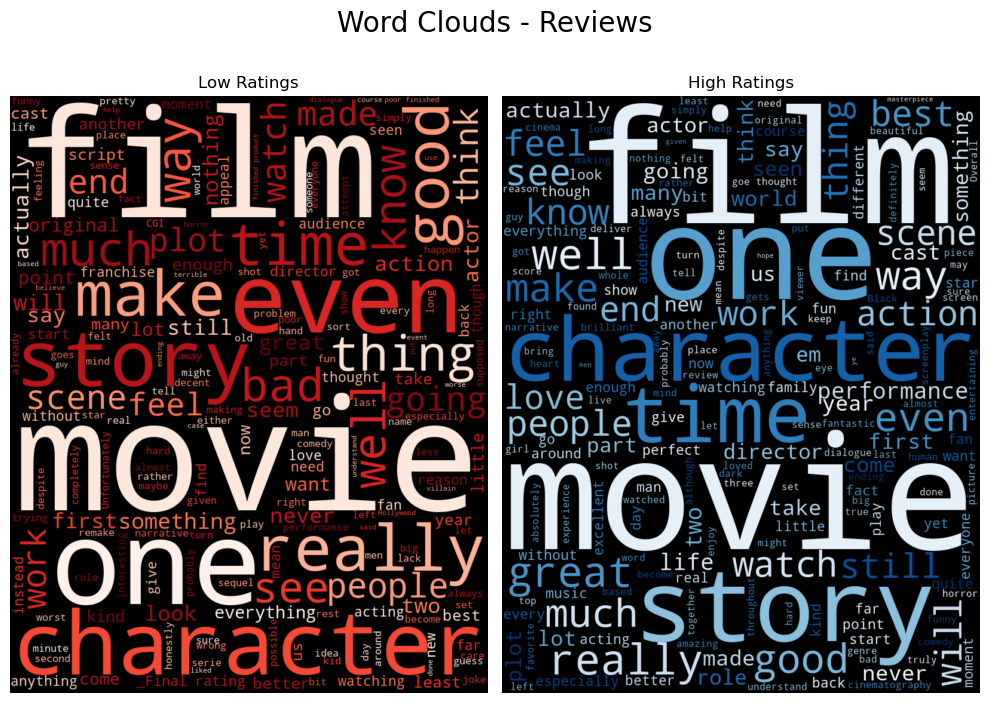

In [22]:
# Make word clouds of raw text
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(low_text)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(high_text)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Reviews', fontsize=20, y=1.05);

In [31]:
image_folder = "Images"

low_cloud.to_file(os.path.join(image_folder, "low_ratings_wordcloud.png"))
high_cloud.to_file(os.path.join(image_folder, "high_ratings_wordcloud.png"))